In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("/kaggle/input/stars-dataset/star_dataset.csv")

In [34]:
df.head(3)

,Name,Distance (ly),Luminosity (L/Lo),Radius (R/Ro),Temperature (K),Spectral Class
0,Altair,16.594171,9.979192,1.632650,7509.294247,A7V
1,Deneb,2600.490723,196002.627856,202.970526,8503.284796,A2Ia
2,Barnard's Star,6.052616,4.893716,0.222711,3165.959639,M4Ve


In [6]:
df.isnull().sum().sum()

0

In [15]:
one_hot=OneHotEncoder(sparse=False)
one=one_hot.fit_transform(df[["Name"]])
one=pd.DataFrame(one,columns=one_hot.get_feature_names_out())
one

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Name_Achernar,Name_Acrux,Name_Aldebaran,Name_Alnilam,Name_Alpha Centauri B,Name_Altair,Name_Antares,Name_Arcturus,Name_Barnard's Star,Name_Bellatrix,...,Name_Polaris,Name_Procyon,Name_Regulus,Name_Rigel,Name_Rigil Kentaurus,Name_Ross 154,Name_Sirius,Name_Spica,Name_Vega,Name_Wolf 359
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.nunique()

Name                   29
Distance (ly)        1000
Luminosity (L/Lo)    1000
Radius (R/Ro)        1000
Temperature (K)      1000
Spectral Class         28
dtype: int64

In [20]:
new_df=pd.concat([df,one],axis=1)
new_df=new_df.drop(columns=["Name"])
new_df

,Distance (ly),Luminosity (L/Lo),Radius (R/Ro),Temperature (K),Spectral Class,Name_Achernar,Name_Acrux,Name_Aldebaran,Name_Alnilam,Name_Alpha Centauri B,...,Name_Polaris,Name_Procyon,Name_Regulus,Name_Rigel,Name_Rigil Kentaurus,Name_Ross 154,Name_Sirius,Name_Spica,Name_Vega,Name_Wolf 359
0,16.594171,9.979192,1.632650,7509.294247,A7V,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2600.490723,196002.627856,202.970526,8503.284796,A2Ia,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.052616,4.893716,0.222711,3165.959639,M4Ve,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,322.601002,2196.241934,37.546813,6048.326915,F7Ib,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.902392,-1.496486,0.192359,3130.602069,M4Ve,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.455715,-4.435101,0.068087,2774.148300,M6V,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,350.301644,49997.506591,9.070882,25010.502656,B1III,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,239.763294,6397.020159,5.706311,22603.548766,B2III,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,4.044364,-4.549088,0.939191,5286.304304,K1V,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X=new_df.drop(columns=["Spectral Class"])
Y=new_df[["Spectral Class"]]

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [28]:
random_class=RandomForestClassifier()
random_class.fit(X_train,Y_train)

/tmp/ipykernel_33/820644298.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_class.fit(X_train,Y_train)


RandomForestClassifier()

In [29]:
random_class.score(X_test,Y_test)

1.0

In [37]:
new_df.iloc[29]

Distance (ly)               9.584936
Luminosity (L/Lo)          -0.262213
Radius (R/Ro)                0.09815
Temperature (K)          2788.607876
Spectral Class                 M3.5V
Name_Achernar                    0.0
Name_Acrux                       0.0
Name_Aldebaran                   0.0
Name_Alnilam                     0.0
Name_Alpha Centauri B            0.0
Name_Altair                      0.0
Name_Antares                     0.0
Name_Arcturus                    0.0
Name_Barnard's Star              0.0
Name_Bellatrix                   0.0
Name_Betelgeuse                  0.0
Name_Canopus                     0.0
Name_Capella                     0.0
Name_Castor                      0.0
Name_Deneb                       0.0
Name_Fomalhaut                   0.0
Name_Hadar                       0.0
Name_Lalande 21185               0.0
Name_Mira                        0.0
Name_Polaris                     0.0
Name_Procyon                     0.0
Name_Regulus                     0.0
N

In [35]:
X_train.head()

,Distance (ly),Luminosity (L/Lo),Radius (R/Ro),Temperature (K),Name_Achernar,Name_Acrux,Name_Aldebaran,Name_Alnilam,Name_Alpha Centauri B,Name_Altair,...,Name_Polaris,Name_Procyon,Name_Regulus,Name_Rigel,Name_Rigil Kentaurus,Name_Ross 154,Name_Sirius,Name_Spica,Name_Vega,Name_Wolf 359
29,9.584936,-0.262213,0.098150,2788.607876,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
535,16.304756,9.844031,1.670264,7595.464571,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695,1999.771263,53699.796947,32.467586,27466.691842,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,5.617673,-1.241340,0.135638,3178.000041,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,860.251568,119995.558672,78.931509,12072.474772,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
y_pred=random_class.predict(X_train)

In [33]:
y_pred

array(['M3.5V', 'A7V', 'B0Ia', 'M4Ve', 'B8Ia', 'B1III-IV', 'F5IV-V',
       'M1.5Iab', 'F7Ib', 'F5IV-V', 'B0Ia', 'A3V', 'A9II', 'G8III',
       'F7Ib', 'M7IIIe', 'A1V', 'B6Vep', 'M2Iab', 'A1V', 'M3.5V',
       'B1III-IV', 'M3.5V', 'M4Ve', 'A7V', 'M4Ve', 'B0Ia', 'A1V', 'B1III',
       'K1V', 'A3V', 'M4Ve', 'G8III', 'G8III', 'B7V', 'A1V', 'B2III',
       'A9II', 'B0.5IV', 'M7IIIe', 'F7Ib', 'K1.5III', 'F7Ib', 'A1V',
       'A7V', 'M1.5Iab', 'A7V', 'G2V', 'M2Iab', 'K1V', 'A7V', 'A2Ia',
       'B0Ia', 'M4Ve', 'M6V', 'A1V', 'F7Ib', 'M6V', 'K1.5III', 'A1V',
       'A1V', 'A0V', 'A7V', 'A2Ia', 'B1III', 'B1III-IV', 'F7Ib', 'M3.5V',
       'M3.5V', 'A9II', 'B1III', 'A1V', 'A9II', 'B0.5IV', 'B0Ia', 'B2III',
       'B0.5IV', 'M3.5V', 'M2Iab', 'A7V', 'G8III', 'A7V', 'A3V', 'M4Ve',
       'B8Ia', 'B0Ia', 'G8III', 'F7Ib', 'G8III', 'M3.5V', 'M1.5Iab',
       'M7IIIe', 'M2.1V', 'B8Ia', 'K1.5III', 'B0.5IV', 'A9II', 'M4Ve',
       'G8III', 'M7IIIe', 'K1.5III', 'M1.5Iab', 'B1III-IV', 'B1III',
       'B0Ia

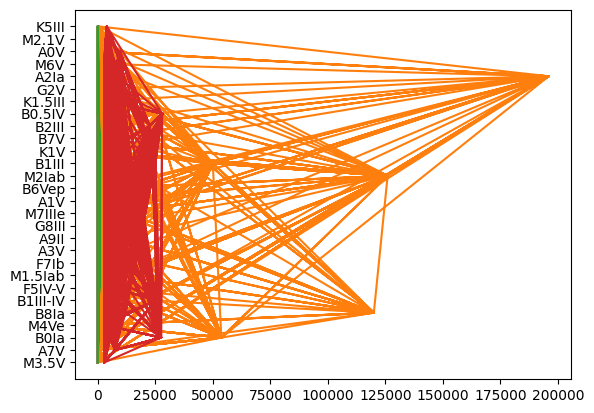

In [38]:
plt.plot(X_train,y_pred)
plt.show()